In [146]:
# Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import matplotlib
from matplotlib.colors import LinearSegmentedColormap

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

## Importing Real time Data

In [147]:
start = dt.datetime(2018,1,1)
end = dt.datetime.now()

against_currency = 'USD'  # Against Currency (Dollars)

### Bitcoin Historical Data

In [148]:
crypto_currency = 'BTC'   # Desired Cryptocurrency

BTC = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
BTC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,1.029120e+10,13657.200195
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,1.684660e+10,14982.099609
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,1.687190e+10,15201.000000
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,2.178320e+10,15599.200195
2018-01-05,17705.199219,15202.799805,15477.200195,17429.500000,2.384090e+10,17429.500000


### Ethereum Historical Data

In [149]:
crypto_currency = 'ETH'   # Desired Cryptocurrency

ETH = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
ETH.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,782.530029,742.004028,755.757019,772.640991,2.595760e+09,772.640991
2018-01-02,914.830017,772.346008,772.346008,884.443970,5.783350e+09,884.443970
2018-01-03,974.471008,868.450989,886.000000,962.719971,5.093160e+09,962.719971
2018-01-04,1045.079956,946.085999,961.713013,980.921997,6.502860e+09,980.921997
2018-01-05,1075.390015,956.325012,975.750000,997.719971,6.683150e+09,997.719971


### Litecoin Historical Data

In [151]:
crypto_currency = 'DOGE'   # Desired Cryptocurrency

DOG = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
DOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,0.009063,0.008101,0.009031,0.008909,50616900.0,0.008909
2018-01-02,0.009598,0.008551,0.008873,0.009145,89424096.0,0.009145
2018-01-03,0.009584,0.008882,0.009088,0.009320,66349900.0,0.009320
2018-01-04,0.010036,0.008768,0.009346,0.009644,108986000.0,0.009644
2018-01-05,0.012283,0.009589,0.009660,0.012167,212383008.0,0.012167


## Data Preparation

In [152]:
close_df = pd.DataFrame()

close_df['BTC'] = BTC['Close']
close_df['ETH'] = ETH['Close']
close_df['DOG'] = LTC['Close']

close_df.head()

,BTC,ETH,DOG
Date,,,
2018-01-01,13657.200195,772.640991,0.008909
2018-01-02,14982.099609,884.443970,0.009145
2018-01-03,15201.000000,962.719971,0.009320
2018-01-04,15599.200195,980.921997,0.009644
2018-01-05,17429.500000,997.719971,0.012167


## Correlation Analysis

In [153]:
returns = close_df.pct_change()
returns.head()

,BTC,ETH,DOG
Date,,,
2018-01-01,NaN,NaN,NaN
2018-01-02,0.097011,0.144702,0.026490
2018-01-03,0.014611,0.088503,0.019136
2018-01-04,0.026196,0.018907,0.034764
2018-01-05,0.117333,0.017125,0.261613


#### Correlation between Bitcoin and Ethereum

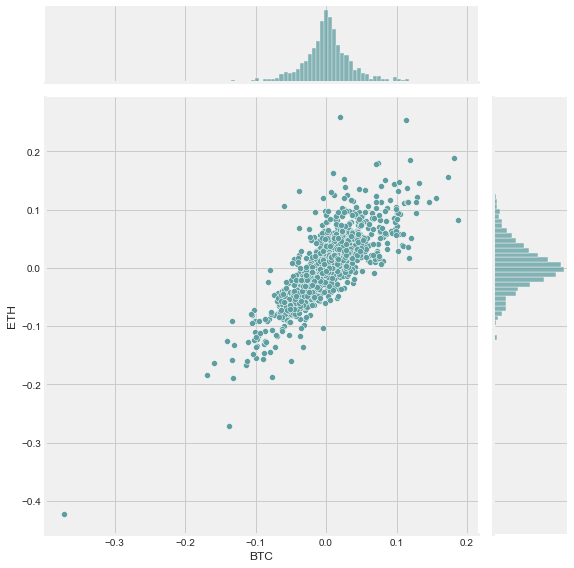

In [154]:
sns.jointplot(data = returns, x = 'BTC', y = "ETH", kind = 'scatter', color = 'cadetblue', height = 8)
plt.show()

#### Correlation between Bitcoin and Litecoin

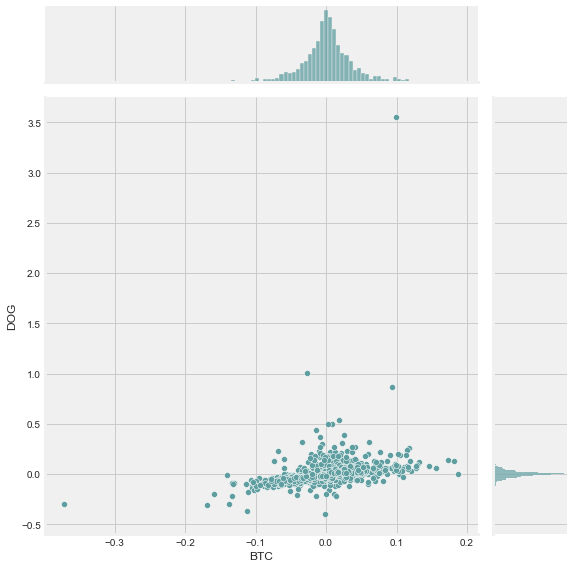

In [155]:
sns.jointplot(data = returns, x = 'BTC', y = "DOG", kind = 'scatter', color = 'cadetblue', height = 8)
plt.show()

### Heatmap

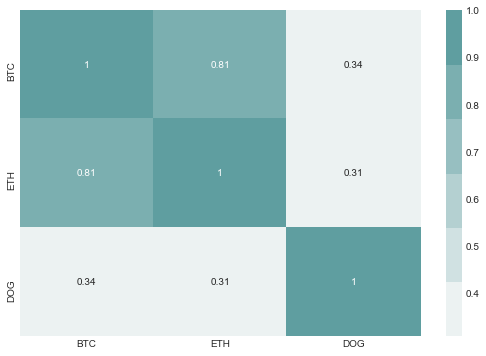

In [169]:
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot = True, cmap = sns.light_palette('cadetblue'))
plt.show()

### Return

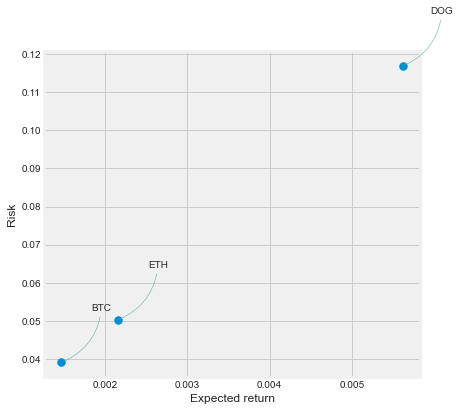

In [177]:
rets = returns.dropna()

area = np.pi * 20

plt.figure(figsize = (6, 6))
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='cadetblue', connectionstyle='arc3,rad=-0.3'))